<a href="https://colab.research.google.com/github/natalie-ava/workflow_automation/blob/main/NHuang_Excel_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

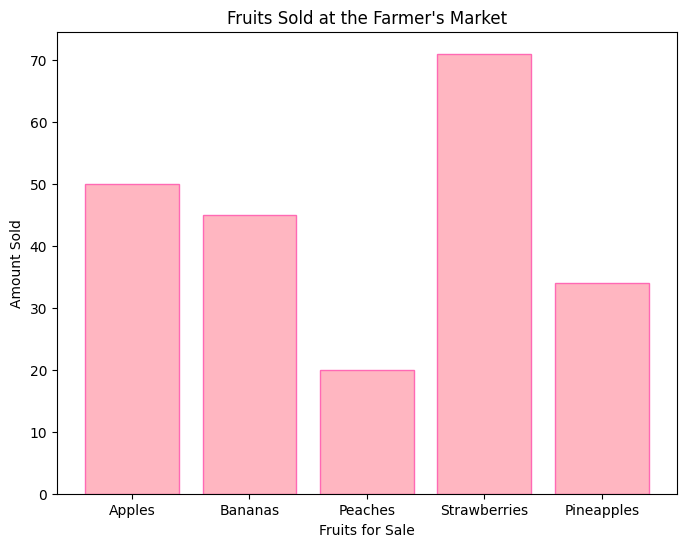

In [ ]:
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.chart import BarChart, Reference
from openpyxl.drawing.image import Image
import pandas as pd
from openpyxl.utils.dataframe import dataframe_to_rows

# Create sample data
data = {
    "Category": ["Apples", "Bananas", "Peaches", "Strawberries", "Pineapples"],
    "Values": [50, 45, 20, 71, 34]
}
df = pd.DataFrame(data)

# Step 1: Create a bar chart using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(df["Category"], df["Values"], color="lightpink", edgecolor="hotpink")
plt.title("Fruits Sold at the Farmer's Market")
plt.xlabel("Fruits for Sale")
plt.ylabel("Amount Sold")
plt.savefig("matplotlib_bar_chart.png")  # Save chart as an image
plt.show()

# Step 2: Create an Excel file and insert the data
wb = Workbook()
ws = wb.active
ws.title = "Fruit Sales"

# Insert data into Excel for both charts
for r in dataframe_to_rows(df, index=False, header=True):
    ws.append(r)

# Insert the matplotlib bar chart image
img = Image("matplotlib_bar_chart.png")
ws.add_image(img, "D1")

# Step 3: Create a bar chart using Openpyxl
chart = BarChart()
chart.width = 15
chart.height = 15
chart.title = "Fruits Sold at the Farmer's Market"
chart.x_axis.title = "Fruits for Sale"
chart.y_axis.title = "Amount Sold"

# Create the reference for the chart data
categories = Reference(ws, min_col=1, min_row=2, max_row=len(df) + 1)
values = Reference(ws, min_col=2, min_row=2, max_row=len(df) + 1)
chart.add_data(values, titles_from_data=True)  # Enable titles_from_data for correct axis labeling
chart.set_categories(categories)
ws.add_chart(chart, "P1")  # Add chart to Excel

# Step 4: Save the Excel file
wb.save("Excel_Chart.xlsx")
